**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)
pd.set_option('display.max_columns', 80)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [3]:
# 1460 rows, 80 columns

local_csv = 'data/train.csv'
housing_df = pd.read_csv(local_csv)
housing_df.set_index('Id', inplace=True)

In [4]:
display(housing_df.head(10))
display(housing_df.tail())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [5]:
assert 1 == 1

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [133]:
# The MSSubClass column, although the categories are numerical, should be a categorical column. This line of code is changing all values in the MSSubClass column from integers to objects in order to make it categorical.

housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(object)

In [134]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

### B. Plot histograms of the numeric columns. 

Initially, there were 3 numerical columns that contained null values. In order to create a useful histogram, I converted these values using linear algebra and a linear model according to one other variable.

For the first column ('LotFrontage'), I thought that this may be correlated to the 'LotArea' feature. Although the linear model, when plotted, does not look that accurate, I figured this would suffice for this scenario. I then filled each missing LotFrontage value with a value according to the prediction model developed below.

In [135]:
# set variable values to the correct column series

y = housing_df[housing_df['LotFrontage'].notnull()]['LotFrontage']
X = housing_df[housing_df['LotFrontage'].notnull()]['LotArea']

In [136]:
# used code from class to compute the beta matrix for this regression model

inverse = np.linalg.inv

def find_betas(X,y):
    bias_col = np.ones(X.shape[0])
    X_with_bias = np.c_[bias_col, X]
    xtxinv = inverse(X_with_bias.T.dot(X_with_bias))
    xty = X_with_bias.T.dot(y)
    betas = xtxinv.dot(xty)
    return betas

In [137]:
betas = find_betas(X,y)

In [138]:
def model_from_betas(betas_array):
    return lambda x: betas_array[0] + betas_array[1] * x

In [139]:
my_model = model_from_betas(betas)

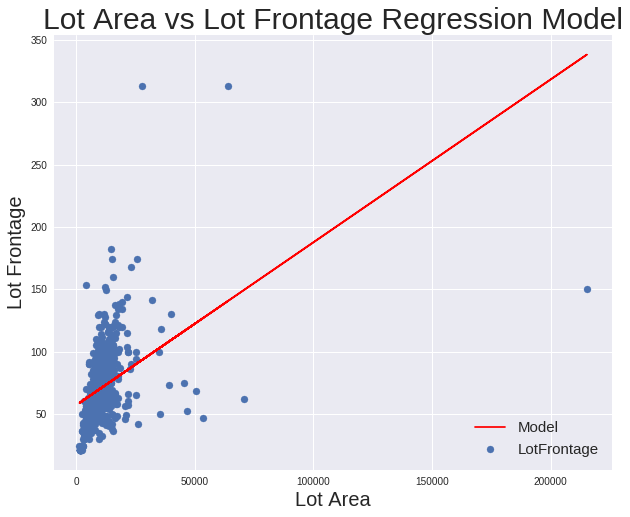

In [140]:
# plotted a graph of the points of Lot Area vs Lot Frontage and also my regression model to see how accurate it was. Once again, it could be more accurate, but should suffice in this sitatuation.

y_pred = np.array([my_model(x) for x in X])

fig = plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.xlabel('Lot Area', fontsize = 20)
plt.ylabel('Lot Frontage', fontsize = 20)
plt.title('Lot Area vs Lot Frontage Regression Model', fontsize=30)
plt.plot(X,y_pred, c='r', label='Model')
plt.legend(fontsize=15)
plt.show()

In [141]:
# replaces the null values in the Lot Frontage column with values from the model according to the corresponding Lot Area

housing_df.loc[housing_df['LotFrontage'].isnull(), 'LotFrontage'] = my_model(housing_df.loc[housing_df['LotFrontage'].isnull(), 'LotArea'])

In [142]:
# The second numerical column with null values was MasVnrArea. I simply filled these missing values with the mean of the other values.

mean = housing_df['MasVnrArea'].mean(skipna = True)
housing_df.loc[housing_df['MasVnrArea'].isnull(), 'MasVnrArea'] = mean

The final numerical column with missing values was the GarageYrBlt column. I figured the year the garage was built may correlate very stronly with the year the house was built. This regression model looks much better than the first one.

Although the regression model worked well, the line of points on the x=y plane show that, for the majority of the houses, the garage was built the same year as the house. Although I considered simply filling the year built value into the garage year built value, I instead decided to use the regression since it takes into account the probability that the garage was built after the house or was remodeled.

In [143]:
y1 = housing_df[housing_df['GarageYrBlt'].notnull()]['GarageYrBlt']
X1 = housing_df[housing_df['GarageYrBlt'].notnull()]['YearBuilt']

In [144]:
betas1 = find_betas(X1, y1)
my_model1 = model_from_betas(betas1)

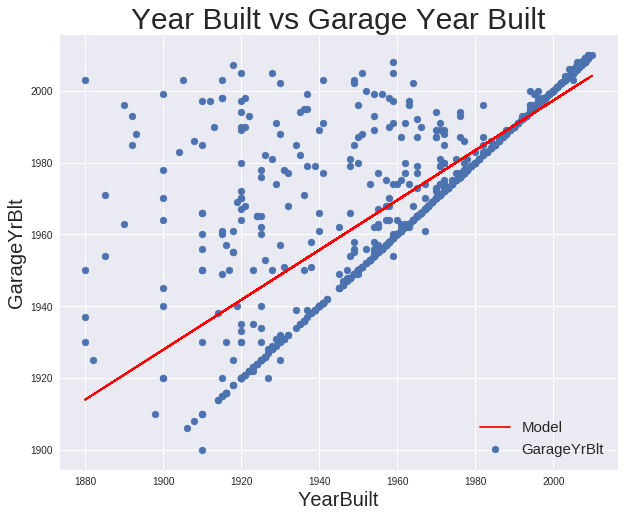

In [145]:
y_pred1 = np.array([my_model1(x) for x in X1])

fig = plt.figure(figsize=(10,8))
plt.scatter(X1, y1)
plt.xlabel('YearBuilt', fontsize = 20)
plt.ylabel('GarageYrBlt', fontsize = 20)
plt.title('Year Built vs Garage Year Built', fontsize=30)
plt.plot(X1, y_pred1, c='r', label='Model')
plt.legend(fontsize=15)
plt.show()

In [146]:
# replaces null values in the GarageYrBlt column with values generated from the linear model shown above

housing_df.loc[housing_df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = my_model1(housing_df.loc[housing_df['GarageYrBlt'].isnull(), 'YearBuilt'])

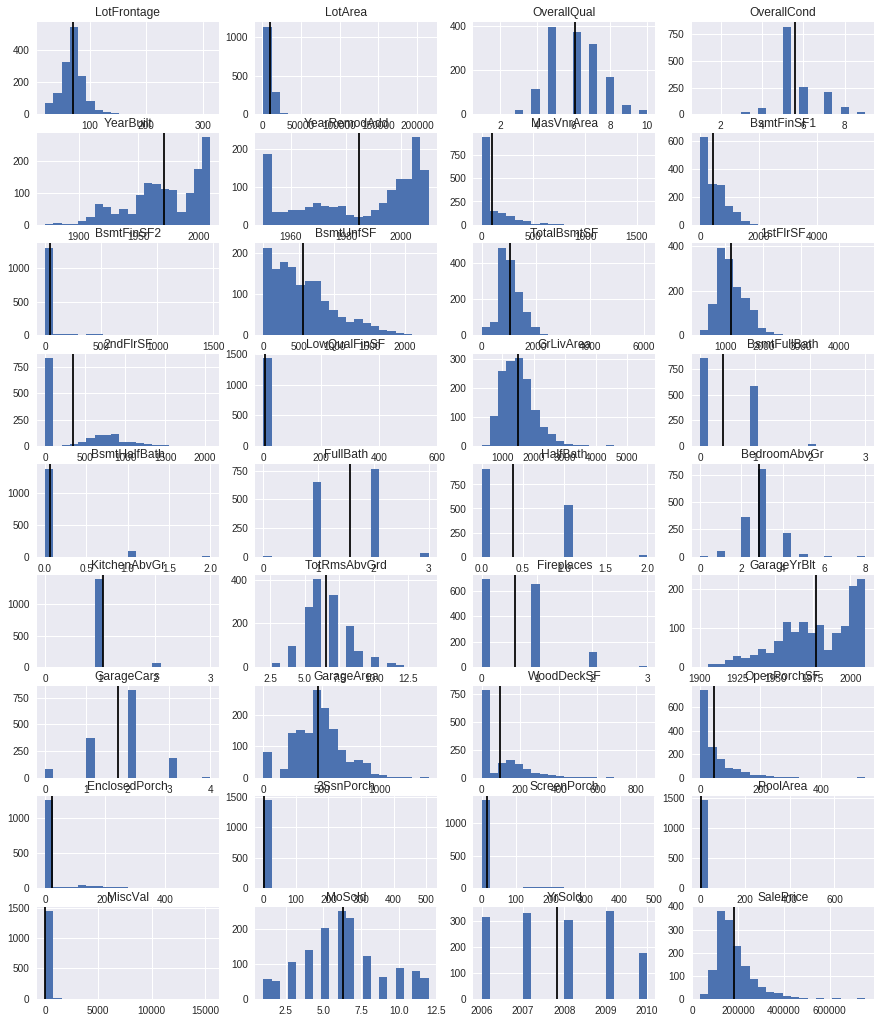

In [147]:
# plots histograms for all (now cleaned) numeric columns

numeric_columns = housing_df.select_dtypes(exclude=['object'])
j = 1
fig = plt.figure(figsize=(15,20))
for i in numeric_columns:
    fig.add_subplot(10,4,j)
    j += 1
    mask = housing_df[i]
    plt.hist(mask, bins = 20)
    plt.title(i)
    plt.axvline(mask.mean(), c='black', label = 'mean')
plt.show()

#### What are your observations? Add them to this markdown cell.

---
The SalePrice looks to be normally distributed, with the average house selling for around $200,000. Most houses are sold during the summer, although this probably does not have an affect on the sale price.

Many of the histograms look to be extremely right skewed, although there are a few that are also left skewed. Most remodels that were added have either been recently added, or were added over 40 years ago, but there are not many houses that were remodeled in the 80s and 90s. Most houses do not have a porch, and the majority of the houses have a 1 car garage.


### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

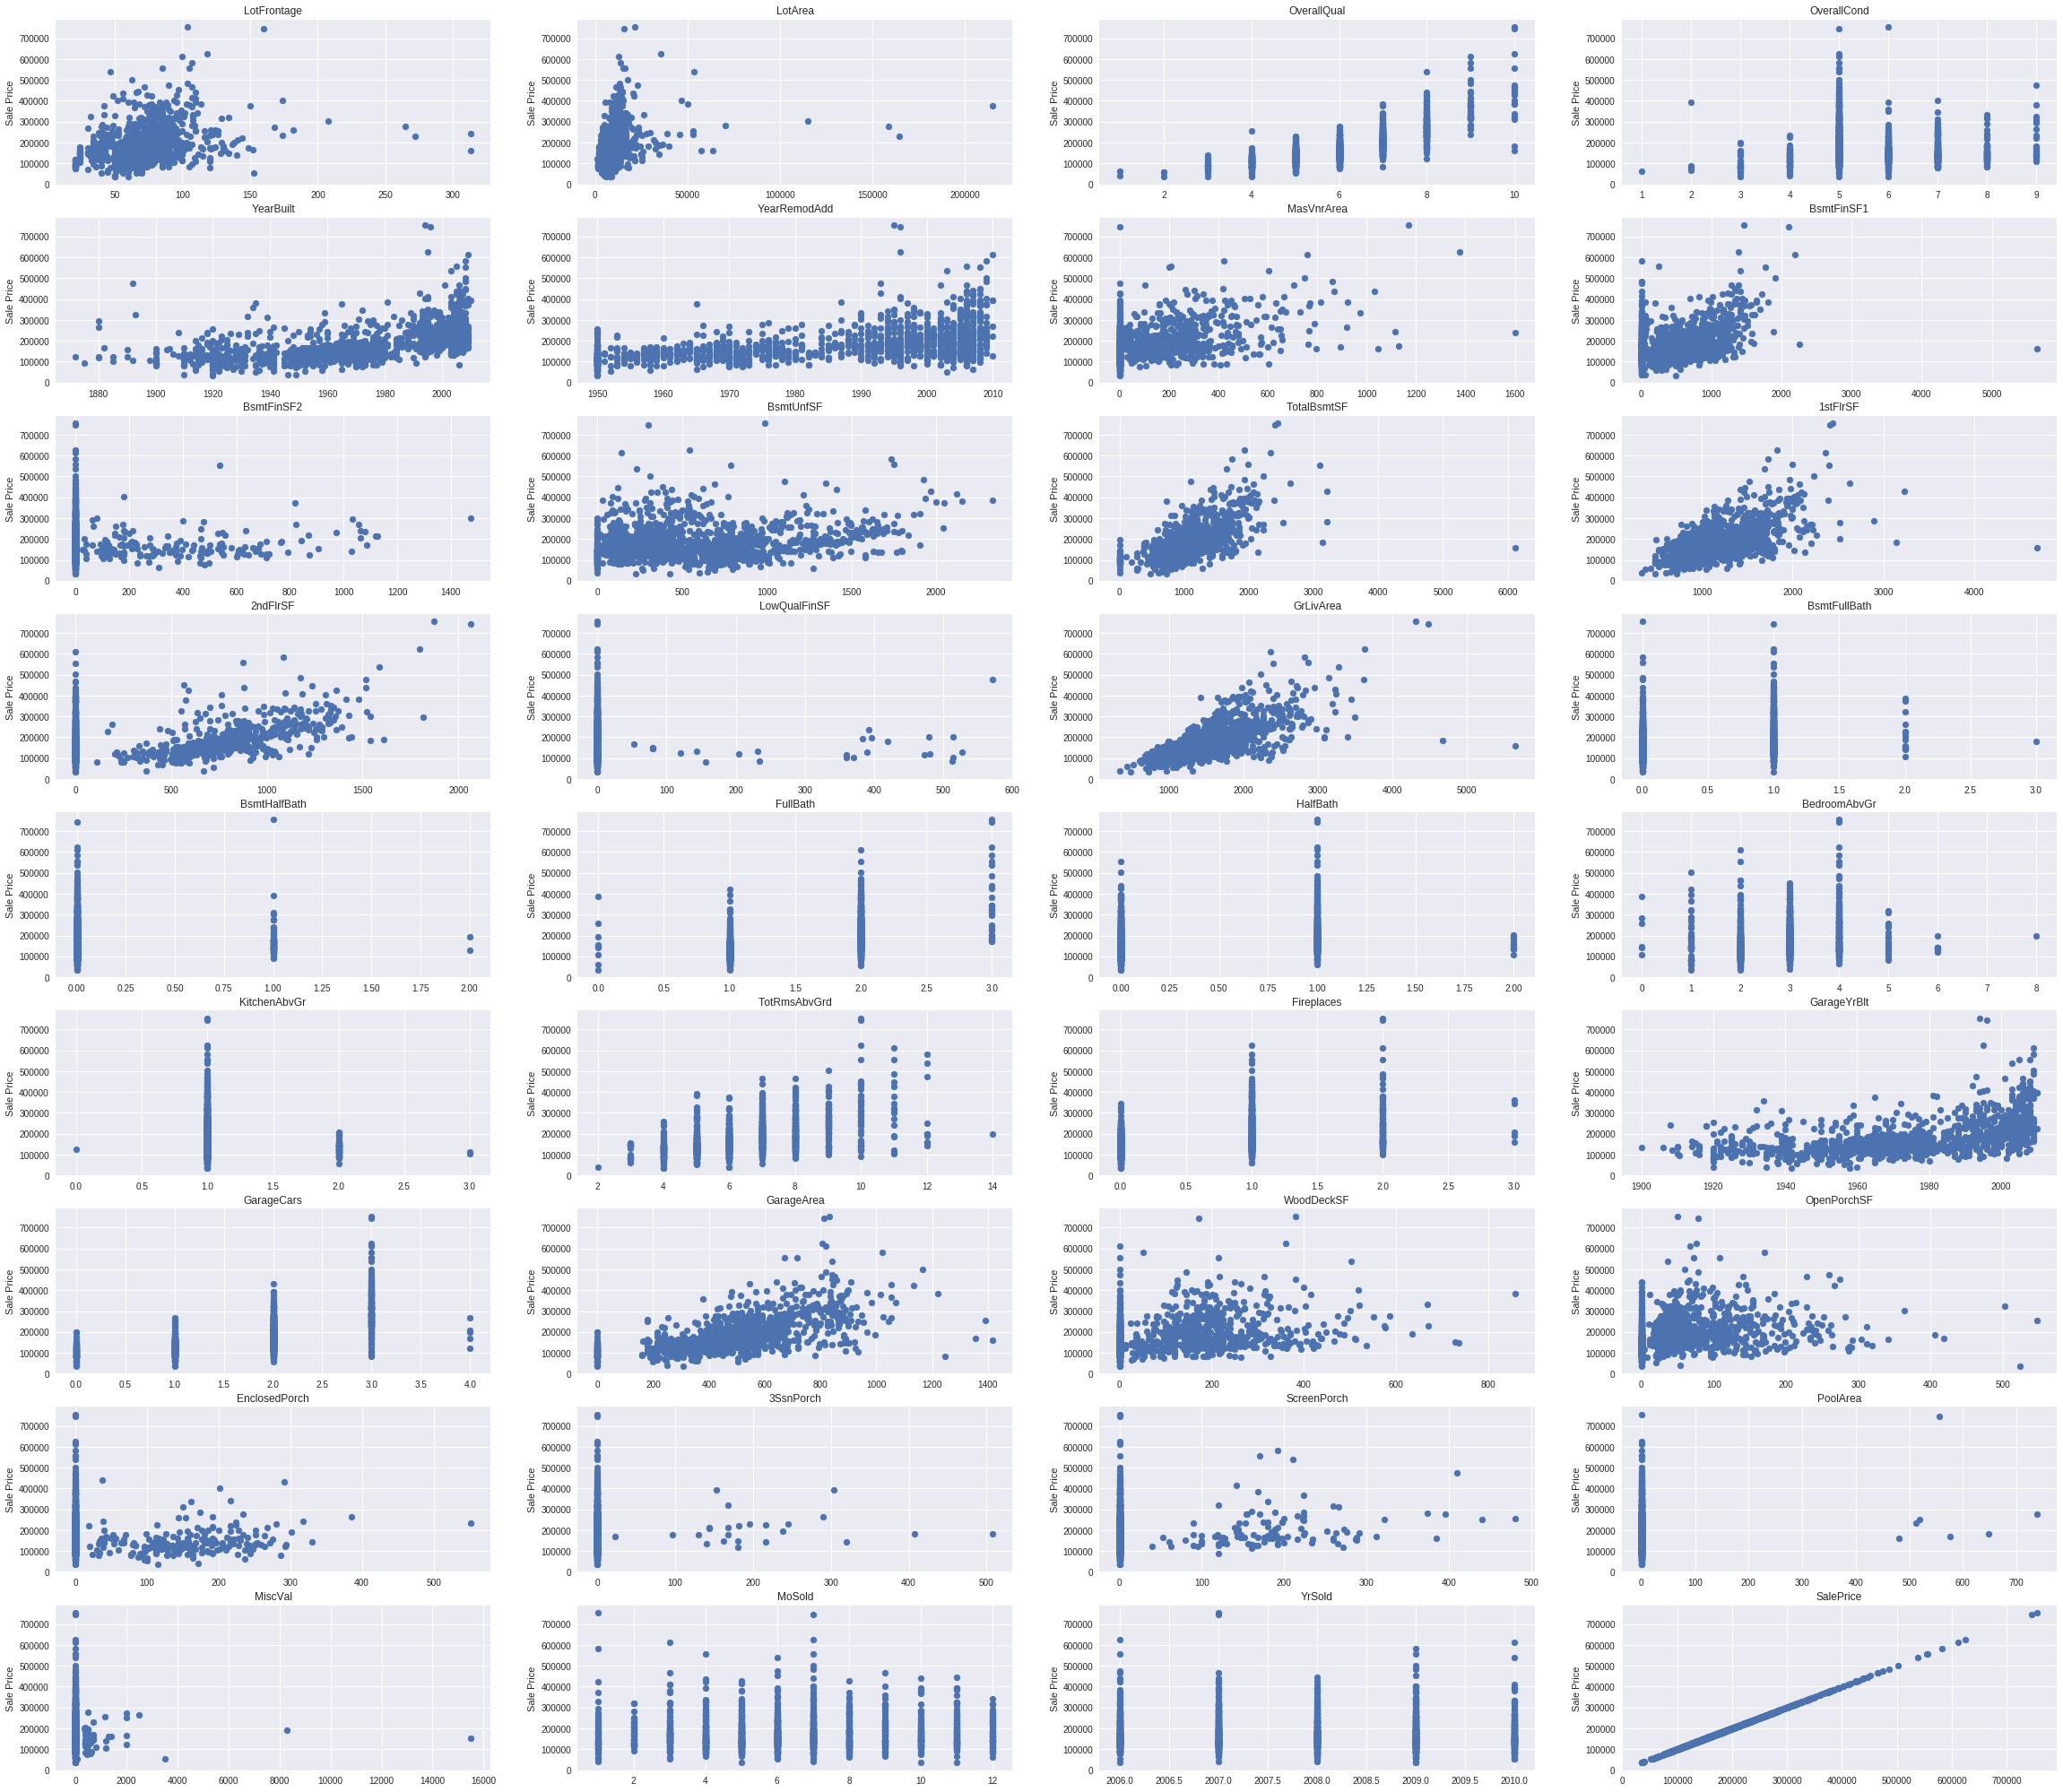

In [148]:
j = 1
fig = plt.figure(figsize=(40,40))
for i in numeric_columns:
    fig.add_subplot(10,4,j)
    j += 1
    mask = housing_df[i]
    plt.scatter(mask, housing_df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.title(i)
plt.show()

#### What are your observations? Add them to this markdown cell.

---
OverallQual, 1stFloorSF, 2ndFloorSF, TotalBsmtSF, GarageArea, and GrLivArea all have noticeably strong positive correlations with SalePrice. This make sense, since tyically the more square footage the house is, and the higher quality the house is, the more the house can sell for. All of the square footage metrics and area metrics having a positive correlation prove the common-sense idea that larger houses typically sell for more than smaller houses. The same common-sense approach can be applied to the OverallQual vs SalePrice, as this proves that the higher quality a house is, the higher the sale price of that house.


### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

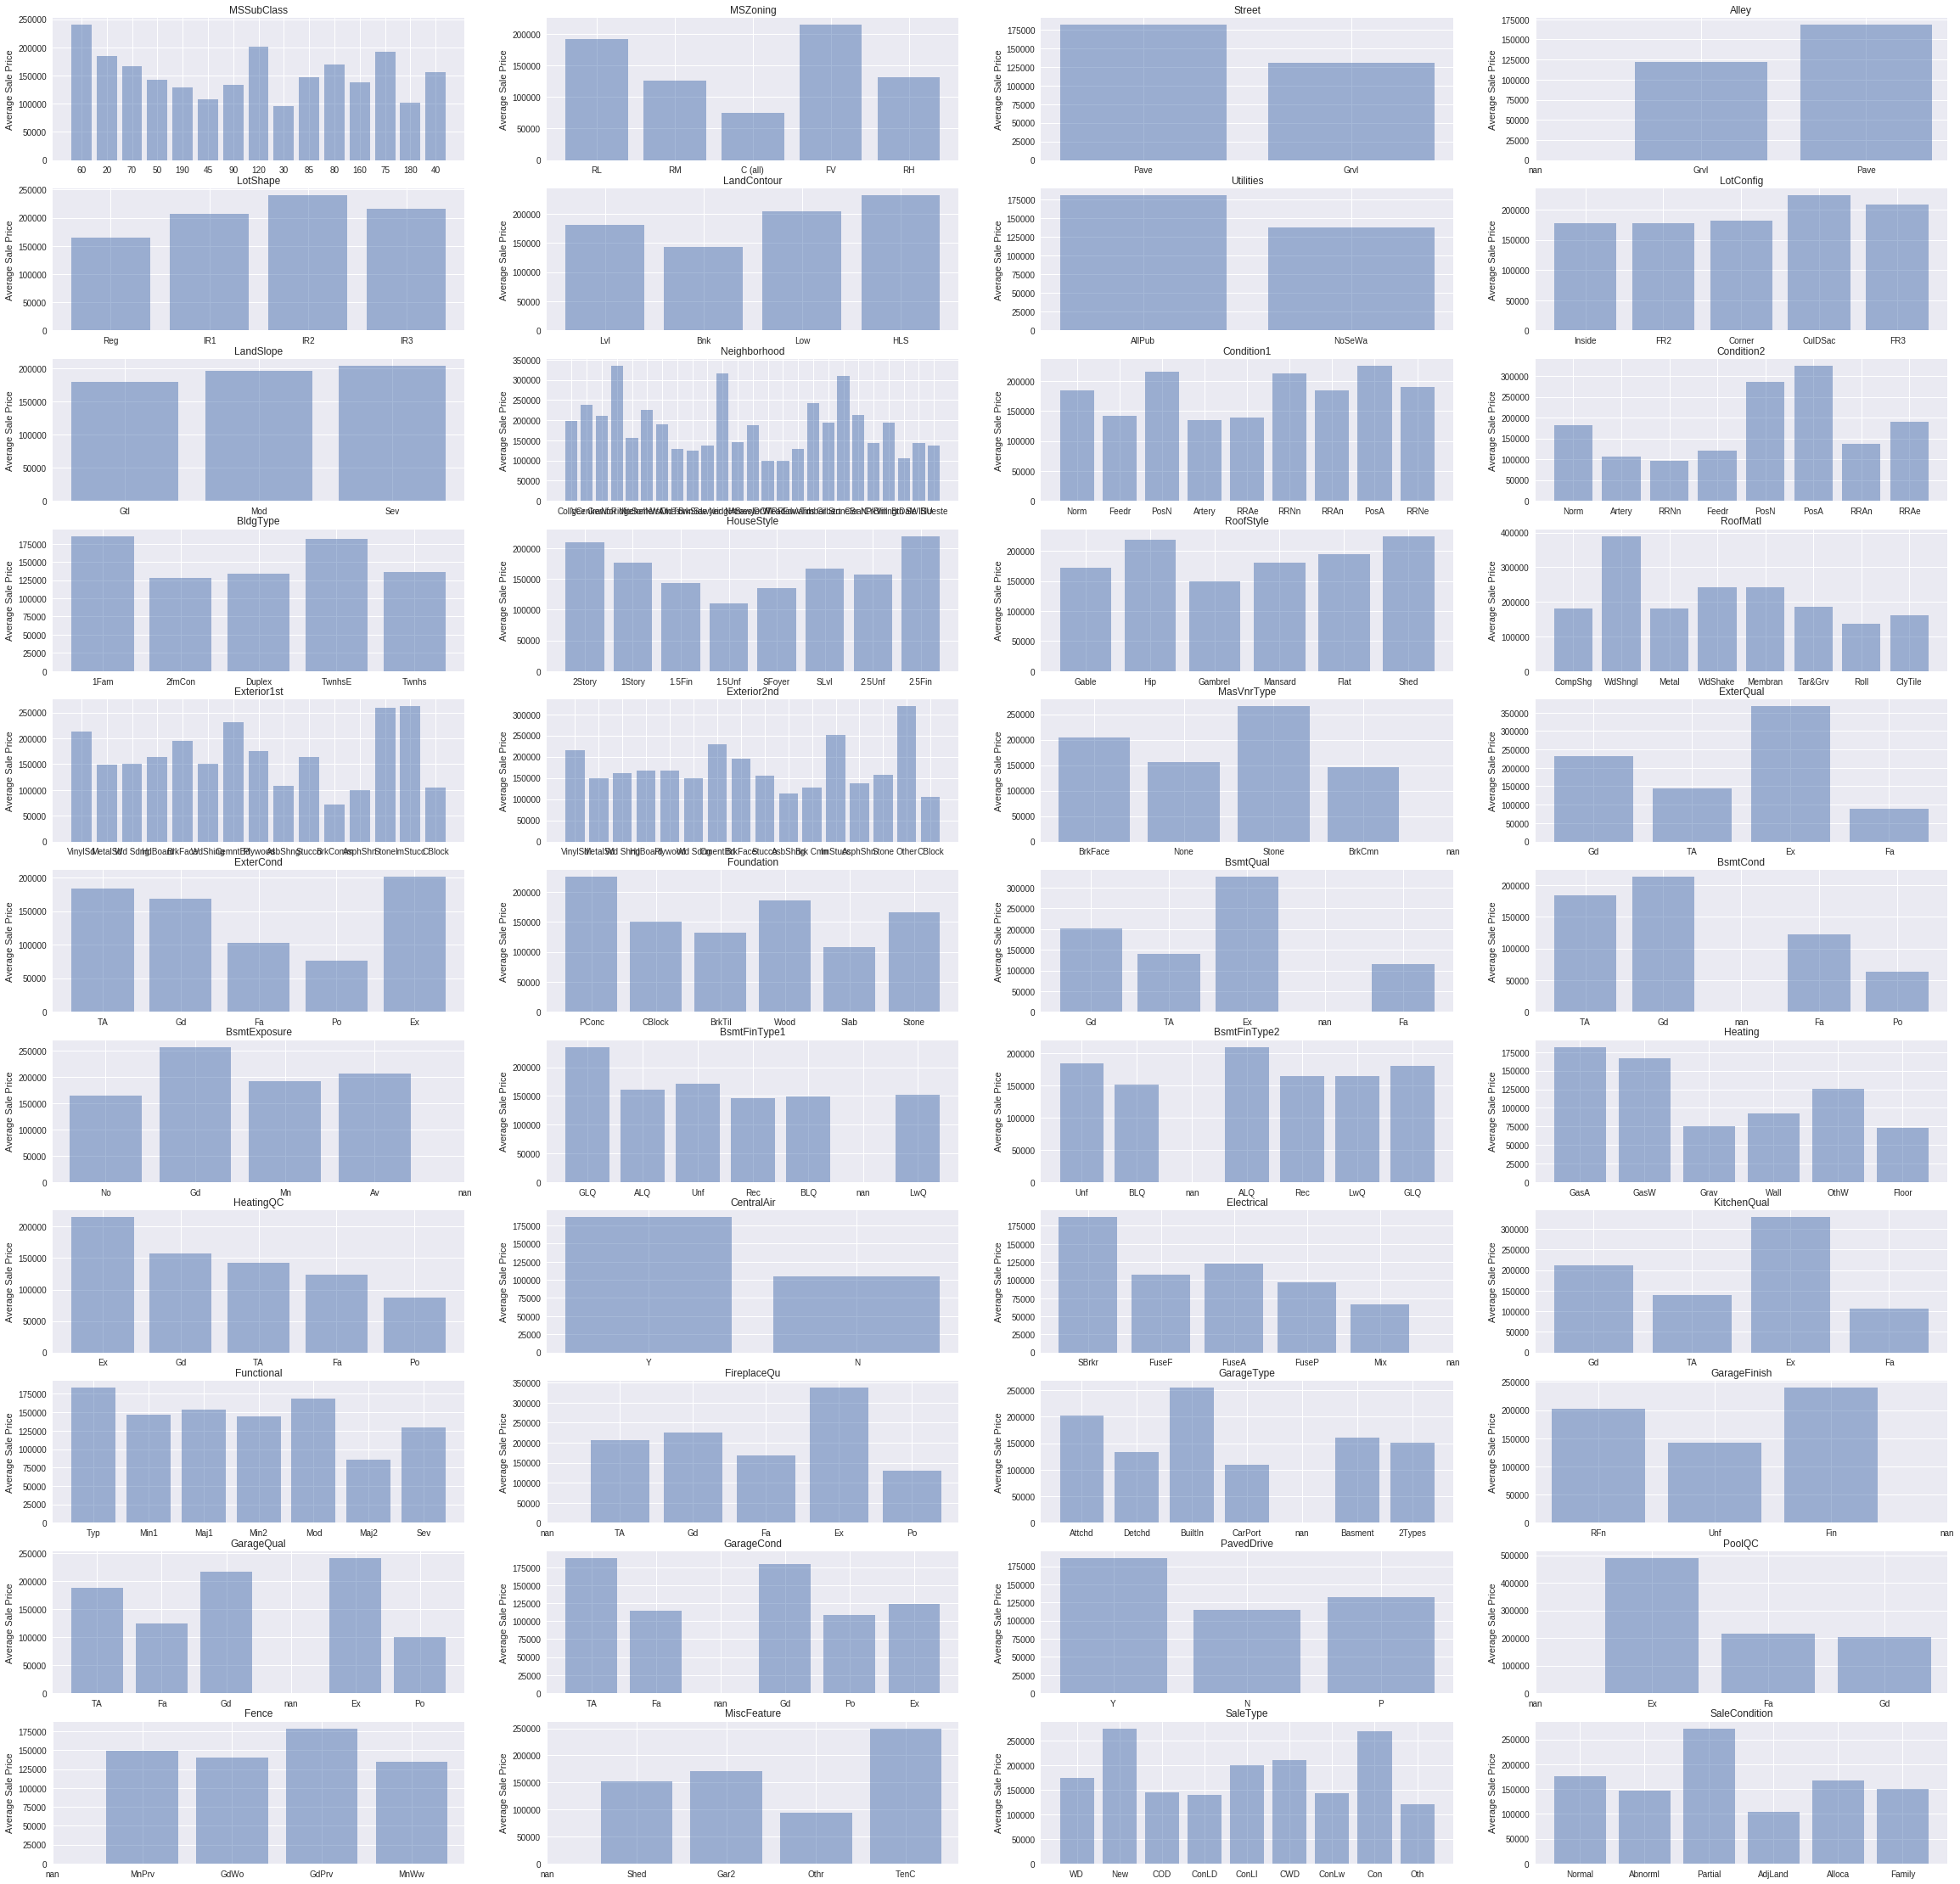

In [149]:
categorical_columns = housing_df.select_dtypes(include=['object'])

j = 1
fig = plt.figure(figsize=(40,40))
for i in categorical_columns:
    fig.add_subplot(11,4,j)
    j += 1
    mask = housing_df[i]

    objects = mask.unique()
    y_pos = np.arange(len(objects))

    performance = []

    for x in objects:
        performance.append(housing_df[mask == x]['SalePrice'].mean())
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Average Sale Price')
    plt.title(i)
 
plt.show()

#### What are your observations? Add them to this markdown cell.

---
MSSubClass category 60 (and category 120 to a lesser extent) has a noticeably higher average sale price than other categories of the MSSubClass column. There are also 3 neighborhoods that have a much higher average sale price than the ther neighborhoods.

Almost every category that contains a Qual or Cond suffix have noticeable differences between poor condition or quality and excellent condition or quality.

If the house functionality is typical or moderate, it is immediately about $25,000 more expensive than any other of the functionality categories.

The exterior quality and material are also very accurate predictors of a higher sale price.


## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

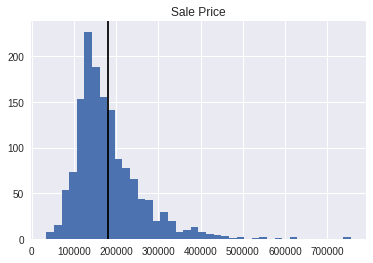

In [150]:
# plot a histogram of SalePrice with a line at the average price

plt.hist(housing_df['SalePrice'], bins=40)
plt.title('Sale Price')
plt.axvline(housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.show()

In [151]:
# calculate the iqr according to the prices at the 25 percentile and the 75 percentile and subtracting these two house prices to get the range. Since Tukey's method is 1.5 times this interquartile range, I have intialized Tukey's as such. I have also chosen to calculate the standard deviation using the numpy standard deviation in order to compare to Tukey's method and decide which value is more usable in this scenario.

iqr = housing_df['SalePrice'].quantile(.75) - housing_df['SalePrice'].quantile(.25)
tukeys = 1.5 * iqr
std = 1.5 * np.std(housing_df['SalePrice'])

An outlier is a value that does not accurately reflect the main distribution of the dataset, because it is too far away from where the standard distribution may lie. In Tukey's Method, this mean it is 1.5 * Standard Deviation away from the mean of the data set in either direction.

In [152]:
# after setting the high_outlier prices and the low_outlier prices according to both Tukey's Method and the standard deviation, I print the number of houses that would be "eliminated" from the dataset if each of the calculations for outliers is used. My reasoning for why I chose Tukey's Method is in the markdown cell below the histogram with cutoff lines added.

high_outliers = housing_df['SalePrice'].mean() + tukeys
low_outliers = housing_df['SalePrice'].mean() - tukeys

display("Using Tukey's Method, the high cutoff is {} and the low cutoff is {}".format(high_outliers, low_outliers))

high_outliers_std = housing_df['SalePrice'].mean() + std
low_outliers_std = housing_df['SalePrice'].mean() - std
display("Using the standard deviation, the high cutoff is {} and the low cutoff is {}".format(high_outliers_std, low_outliers_std))

display("For Tukey's Method, there are {} high outliers and {} low outliers, a total of {} outliers".format(housing_df[housing_df['SalePrice'] > high_outliers]['SalePrice'].count(), housing_df[housing_df['SalePrice'] < low_outliers]['SalePrice'].count(), housing_df[housing_df['SalePrice'] > high_outliers]['SalePrice'].count() + housing_df[housing_df['SalePrice'] < low_outliers]['SalePrice'].count()))

display("For the standard deviation, there are {} high outliers and {} low outliers, a total of {} outliers".format(housing_df[housing_df['SalePrice'] > high_outliers_std]['SalePrice'].count(), housing_df[housing_df['SalePrice'] < low_outliers_std]['SalePrice'].count(), housing_df[housing_df['SalePrice'] > high_outliers_std]['SalePrice'].count() + housing_df[housing_df['SalePrice'] < low_outliers_std]['SalePrice'].count()))

"Using Tukey's Method, the high cutoff is 306958.6958904109 and the low cutoff is 54883.69589041095"

'Using the standard deviation, the high cutoff is 300044.1337195122 and the low cutoff is 61798.25806130968'

"For Tukey's Method, there are 107 high outliers and 7 low outliers, a total of 114 outliers"

'For the standard deviation, there are 115 high outliers and 15 low outliers, a total of 130 outliers'

After running the data for Tukey's Method, there are 7 houses that are considered low outliers and 107 houses that are considered high outliers. These numbers determine that  7.81% of the dataset is considered an outlier. 

For the standard deviation, there are 15 houses that are considered low outliers and 115 houses that are considerd high outliers. These numbers determine that 8.90% of the dataset is considered an outlier.

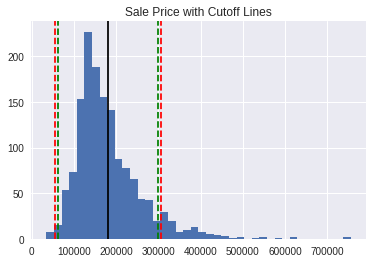

In [153]:
# plots a histogram of sale price with cutoff lines where each calculated outlier detector from above would cut the dataset. Green is the standard deviation, red is Tukey's Method

plt.hist(housing_df['SalePrice'], bins=40)
plt.title('Sale Price with Cutoff Lines')
plt.axvline(housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.axvline(high_outliers, c='red', linestyle ='--')
plt.axvline(low_outliers, c='red', linestyle ='--')
plt.axvline(high_outliers_std, c='green', linestyle ='--')
plt.axvline(low_outliers_std, c='green', linestyle ='--')
plt.show()

Tukey's Method is a good outlier detection, because 7.91% outliers is a healthy size for an outlier dataset, and, although 8.90% is also a healthy size for outliers, for this dataset, I think the extra data is still good to have.

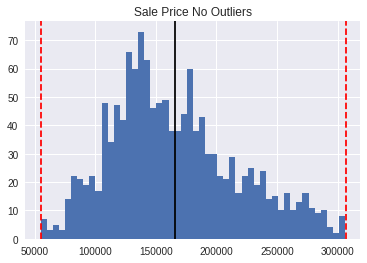

In [154]:
# plot a histogram of sale price after the outliers have been eliminated (still with Tukey's Method cutoff lines)

housing = housing_df[housing_df['SalePrice'] >= low_outliers]
new_housing_df = housing[housing['SalePrice'] <= high_outliers]

plt.hist(new_housing_df['SalePrice'], bins=50)
plt.title('Sale Price No Outliers')
plt.axvline(new_housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.axvline(high_outliers, c='red', linestyle ='--')
plt.axvline(low_outliers, c='red', linestyle ='--')
plt.show()

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [155]:
# creates a list of all columns that contain at least 1 null value

labels = []

for columns in new_housing_df:
    if new_housing_df[new_housing_df[columns].isnull()].count()['MSSubClass'] != 0:
        labels.append(columns)
        

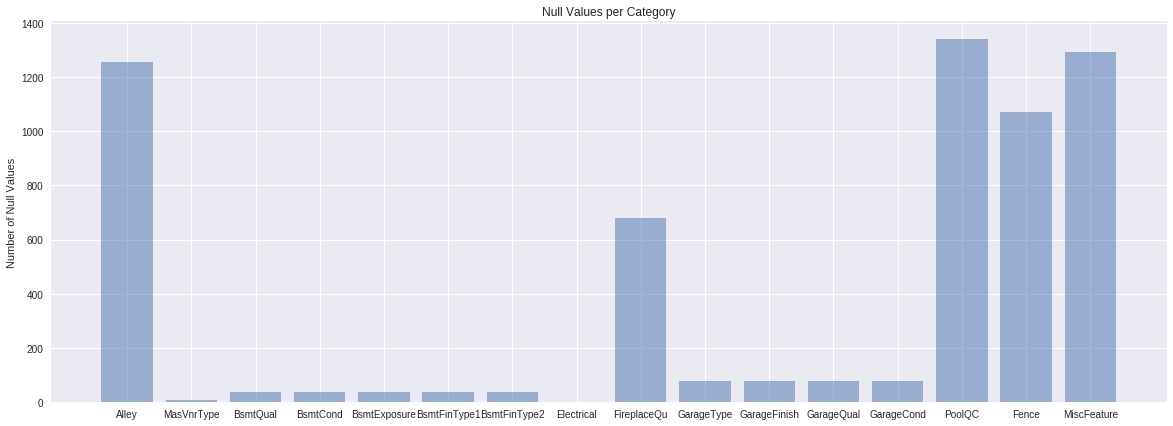

In [156]:
# plots a histogram of all of the null values in the columns found in the list created above

fig = plt.figure(figsize=(20,7))
mask = []
for features in labels:    
    mask.append(new_housing_df[new_housing_df[features].isnull()].count()['MSSubClass'])

plt.bar(np.arange(len(labels)), mask, align='center', alpha=0.5)
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel('Number of Null Values')
plt.title('Null Values per Category')
 
plt.show()

Alley: either 'Grvl' or 'Pave'. nan stands for "No Alley Access", therefore I will change to NAA (No Alley Access).

MasVnrType: 'BrkFace', 'None', 'Stone', or 'BrkCmn'. In this case, I am choosing to replace the nan values with 'None'.

BsmtQual: 'Gd', 'TA', 'Ex', 'Fa', or 'NA'. 'NA' stands for 'No Basement' so I am changing this to 'NB'.

BsmtCond: 'Ex', 'Gd', 'TA', 'Fa', 'Po' or 'NA'. 'NA' stands for 'No Basement' so I am changing this to 'NB'.

BsmtExposure: In BsmtQual and BsmtCond, 36 houses did not have a basement. For BsmtExposure, there are 37 values, which means 36 should be replaced with 'NB'. The other basement is not finished with construction and I am therefore setting it to Average Exposure (since it is unknown) 'Av'. (949)

BsmtFinType1: Has 36 values, i.e. 'NB'.

BsmtFinType2: Has 37 values, 36 will be set to 'NB' and the other will be set to the mode value of 'Unf' since 87.5% of the values are 'Unf'. (333)

Electrical: Only 1 null value. The mode value of 'SBrkr' appears 91% of the time, so will replace null with this.

FireplaceQu:'NA' means No Fireplace so will replace with 'NF'.

GarageType: For all 4 Garage metrics (GarageType, GarageFinish, GarageQual, and GarageCond) there are 76 missing values. In the data description, 'NA' means that there is no garage. For all 4 metrics, I will change 'NA' to 'NG'.

GarageFinish: 'NA' to 'NG'.

GarageQual: 'NA' to 'NG'.

GarageCond: 'NA' to 'NG'.

PoolQC: 'NA' means no pool. Change to 'NP'.

Fence: 'NA' means no fence. Change to 'NF'.

MiscFeature: 'NA' means none. Will replace with 'None'

In [157]:
# according to the markdown cell above, all null values from each column are replaced with non null values

new_housing_df.loc[new_housing_df['Alley'].isnull(), 'Alley'] = 'NAA'
new_housing_df.loc[new_housing_df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
new_housing_df.loc[new_housing_df['BsmtQual'].isnull(), 'BsmtQual'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtCond'].isnull(), 'BsmtCond'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NB'
new_housing_df.loc[new_housing_df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
new_housing_df.loc[new_housing_df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NF'
new_housing_df.loc[new_housing_df['GarageType'].isnull(), 'GarageType'] = 'NG'
new_housing_df.loc[new_housing_df['GarageFinish'].isnull(), 'GarageFinish'] = 'NG'
new_housing_df.loc[new_housing_df['GarageQual'].isnull(), 'GarageQual'] = 'NG'
new_housing_df.loc[new_housing_df['GarageCond'].isnull(), 'GarageCond'] = 'NG'
new_housing_df.loc[new_housing_df['PoolQC'].isnull(), 'PoolQC'] = 'NP'
new_housing_df.loc[new_housing_df['Fence'].isnull(), 'Fence'] = 'NF'
new_housing_df.loc[new_housing_df['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
new_housing_df.loc[949, 'BsmtExposure'] = 'Av'
new_housing_df.loc[333, 'BsmtFinType2'] = 'Unf'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Verify that you have *truly* eliminated all the null values!

In [158]:
# running the same code as before to create a list of columns where there is at least 1 null value, the list is empty

labels = []

for features in new_housing_df:
    if new_housing_df[new_housing_df[features].isnull()].count()['MSSubClass'] != 0:
        labels.append(features)

display(labels)

[]

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [159]:
# create a new dataframe with dummy variables, but keeps old dataframe just in case

practice_df = new_housing_df

In [160]:
# for all columns of type object, loop through these and create dummy variables. I have set drop_first=True to eliminate colinearity when creating the models later on in the project.
# also dropping the initial column from practice_df so that there are no categorical columns left in the data set.

categories = new_housing_df.select_dtypes(include=['object'])
category = categories.columns
for x in category:
    dummy = pd.get_dummies(practice_df[x], x, drop_first=True)
    dummy_practice = practice_df.join(dummy)
    practice_df = dummy_practice.drop(x, 1)
    

In [161]:
display(practice_df.head())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
# splits data in to train and test set with 25% of the data in the test set and 75% in the train set

X_train, X_test, y_train, y_test = train_test_split(practice_df, practice_df['SalePrice'], random_state = 42)

In [164]:
X_train = X_train.drop('SalePrice', 1)
X_test = X_test.drop('SalePrice', 1)
display(X_train.info())
display(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 397 to 1226
Columns: 270 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(235)
memory usage: 515.3 KB


None

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
397,60.000000,7200,5,5,1972,1972,0.0,777,0,117,894,894,0,0,894,0,0,1,0,2,1,6,0,1985.0,2,600,215,0,0,0,0,0,0,9,2009,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
385,126.402098,53107,6,5,1992,1992,0.0,985,0,595,1580,1079,874,0,1953,1,0,2,1,3,1,9,2,1992.0,2,501,216,231,0,0,0,0,0,6,2007,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
339,91.000000,14145,7,7,1984,1998,0.0,213,0,995,1208,1621,0,0,1621,1,0,2,0,3,1,8,0,1984.0,2,440,108,45,0,0,0,0,400,5,2006,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
464,74.000000,11988,6,7,1934,1995,0.0,326,0,389,715,849,811,0,1660,0,0,1,1,3,1,6,1,1939.0,1,240,0,0,0,0,0,0,0,8,2008,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
564,66.000000,21780,6,7,1918,1950,0.0,0,0,1163,1163,1163,511,0,1674,0,0,2,0,4,1,8,1,1955.0,2,396,72,36,0,0,144,0,0,7,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [165]:
display(X_test.info())
display(X_test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 979 to 1366
Columns: 270 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(235)
memory usage: 172.1 KB


None

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
979,68.0,9450,4,5,1954,1954,0.0,552,0,342,894,894,0,0,894,0,0,1,0,3,1,5,0,1999.0,2,400,0,0,0,0,0,0,0,5,2007,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1241,65.0,8158,7,5,2003,2003,252.0,550,0,334,884,884,884,0,1768,1,0,2,1,3,1,8,0,2003.0,2,543,0,63,0,0,0,0,0,7,2008,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
372,80.0,17120,4,4,1959,1959,0.0,0,0,0,0,1120,468,0,1588,0,0,2,0,4,1,7,1,1991.0,2,680,0,59,0,0,0,0,0,7,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
765,30.0,9549,8,5,1995,1996,0.0,437,1057,0,1494,1494,0,0,1494,1,0,1,1,2,1,6,1,1995.0,2,481,0,30,0,0,216,0,0,4,2006,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
302,66.0,16226,8,5,1998,1999,0.0,281,0,747,1028,1210,1242,0,2452,0,0,2,1,4,1,9,1,1998.0,2,683,208,50,0,0,0,0,0,5,2007,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [166]:
display(y_train.head())

Id
397    123000
385    240000
339    202500
464    188700
564    185000
Name: SalePrice, dtype: int64

In [167]:
display(y_test.head())

Id
979     110000
1241    224900
372     134432
765     270000
302     267000
Name: SalePrice, dtype: int64

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
# scale the data

ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [170]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [171]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [172]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [173]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [174]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [175]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [176]:
benchmark_scaled = LinearRegression()

In [177]:
benchmark_scaled.fit(X_train_fit, y_train)
scaled_train_score = benchmark_scaled.score(X_train_fit, y_train)
scaled_test_score = benchmark_scaled.score(X_test_fit, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [178]:
initial_results = pd.DataFrame(results)
initial_results.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.389788e-01
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.389788e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.144477e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-7.758156e+19


#### What are your observations? Add them to this markdown cell.

---
The train scores are both very good for these models (above 90%), however the test scores are not good at all (one of them is an extremely large negative number?). This would point to the model overfitting the data set, since the train score is significantly better than the test score, and it cannot be generalize to anything outside of the train set.

In terms of the bias/variance tradeoff, this model has a very low bias but a very high variance. Below, in the regularization step, the variance should be reduced and the bias should be increased, hopefully eliminating the overfitting.

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [179]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [180]:
# created a function with inputs of the model type and model name and creates the scaled model version of that model fit with the scaled data. The test and train scores are calculated and appended to the results list.

def model_scaled(model, name):
    model_name = model()
    model_name.fit(X_train_fit, y_train)
    model_scaled_train_score = model_name.score(X_train_fit, y_train)
    model_scaled_test_score = model_name.score(X_test_fit, y_test)
    results.append({'name':name,
                'model':model,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': model_scaled_train_score})
    results.append({'name':name,
                'model':model,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': model_scaled_test_score})

In [181]:
# created a function with inputs of the model type and model name and creates the raw model version of that model fit with the raw data. The test and train scores are calculated and appended to the results list.

def model_raw(model, name):
    model_name = model()
    model_name.fit(X_train, y_train)
    model_train_score = model_name.score(X_train, y_train)
    model_test_score = model_name.score(X_test, y_test)
    results.append({'name':name,
                'model':model,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': model_train_score})
    results.append({'name':name,
                'model':model,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': model_test_score})

In [182]:
# All 3 models are fit and the train and test scores are appended to the results list using the functions created above.

model_scaled(Ridge, 'ridge')
model_raw(Ridge, 'ridge')
model_scaled(Lasso, 'lasso')
model_raw(Lasso, 'lasso')
model_scaled(ElasticNet, 'elasticnet')
model_raw(ElasticNet, 'elasticnet')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [183]:
# display the results dataframe with the overall test score from high to low.

results_df = pd.DataFrame(results)
results_df.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.389788e-01
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.389788e-01
8,train,<class 'sklearn.linear_model.coordinate_descen...,lasso,scaled,9.389651e-01
10,train,<class 'sklearn.linear_model.coordinate_descen...,lasso,raw,9.388378e-01
4,train,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,scaled,9.387637e-01
6,train,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,raw,9.155448e-01
12,train,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,scaled,8.862305e-01
13,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,scaled,8.335482e-01
14,train,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,raw,8.269873e-01
7,test,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,raw,8.083766e-01


Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [184]:
# display only the raw test scores with the scores from high to low

raw_test = results_df[(results_df.preprocessing == 'raw') & (results_df.dataset == 'test')]
raw_test.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
7,test,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,raw,0.808377
15,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,raw,0.798223
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.514448
11,test,<class 'sklearn.linear_model.coordinate_descen...,lasso,raw,0.453817


#### What are your observations? Add them to this markdown cell.

The Ridge model and ElasticNet model have the best test scores for the raw data. The other two scores are not acceptable as models (LinearRegression and Lasso). A score of about 0.80 is relatively high, and therefore the Ridge model and ElasticNet model could be viable options.



#### Display just the scaled test results

In [185]:
# display only the scaled test scores with the scores from high to low

scaled_test = results_df[(results_df.preprocessing == 'scaled') & (results_df.dataset == 'test')]
scaled_test.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
13,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,scaled,8.335482e-01
5,test,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,scaled,4.434802e-01
9,test,<class 'sklearn.linear_model.coordinate_descen...,lasso,scaled,3.661263e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-7.758156e+19


#### What are your observations? Add them to this markdown cell.

I am not sure why the LinearRegression score is such a large negative number. The other scores are also very low except for the ElasticNet, which has a relatively high score of 0.834. This is an acceptable score and makes this a viable option for modelling.



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [186]:
# display only the benchmark (LinearRegression) test scores with the scores from high to low

benchmark_models = results_df[(results_df.name == 'benchmark')]
benchmark_models.sort_values('preprocessing', ascending=True)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.389788e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.144477e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.389788e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-7.758156e+19


#### Display just the Ridge models

In [187]:
# display only the Ridge test scores with the scores from high to low

ridge_models = results_df[(results_df.name == 'ridge')]
ridge_models.sort_values('preprocessing', ascending=True)

,dataset,model,name,preprocessing,score
6,train,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,raw,0.915545
7,test,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,raw,0.808377
4,train,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,scaled,0.938764
5,test,<class 'sklearn.linear_model.ridge.Ridge'>,ridge,scaled,0.443480


#### Display just the Lasso models

In [188]:
# display only the Lasso test scores with the scores from high to low

lasso_models = results_df[(results_df.name == 'lasso')]
lasso_models.sort_values('preprocessing', ascending=True)

,dataset,model,name,preprocessing,score
10,train,<class 'sklearn.linear_model.coordinate_descen...,lasso,raw,0.938838
11,test,<class 'sklearn.linear_model.coordinate_descen...,lasso,raw,0.453817
8,train,<class 'sklearn.linear_model.coordinate_descen...,lasso,scaled,0.938965
9,test,<class 'sklearn.linear_model.coordinate_descen...,lasso,scaled,0.366126


#### Display just the Elasticnet models

In [189]:
# display only the ElasticNet test scores with the scores from high to low

elasticnet_models = results_df[(results_df.name == 'elasticnet')]
elasticnet_models.sort_values('preprocessing', ascending=True)

,dataset,model,name,preprocessing,score
14,train,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,raw,0.826987
15,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,raw,0.798223
12,train,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,scaled,0.886230
13,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnet,scaled,0.833548


#### What are your observations? Add them to this markdown cell.

The benchmark test scores are very low for both the raw data and the scaled data. 

For the Ridge model, the raw train and test score are high and make sense for a normally fit data set, however the Ridge model when used with the scaled data looks to be overfitting the data since the test score is much lower than the train score. 

The Lasso model appears to be overfitting the data for both the raw and scaled data sets, since the test scores are much lower for both sets than the train score.

Finally, the ElasticNet looks to be perfectly fitting both data sets, but the scaled data set is especially good. A train score of 0.89 is very good, and with a corresponding test score of 0.83, this model looks to be fitting the data very well.

### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [190]:
cv_results = list()

In [191]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [192]:
# created a function with inputs of model type and model name to fit and score each cross validated scaled model and append this (along with other information) score to the cv_results list.

def cv_scaled(model, name):
    model_scaled_name = model(alphas = np.logspace(-2, 4, 7))
    model_scaled_name.fit(X_train_fit, y_train)
    model_scaled_train_score = model_scaled_name.score(X_train_fit, y_train)
    model_scaled_test_score = model_scaled_name.score(X_test_fit, y_test)
    cv_results.append({'name':name,
                'model':model,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': model_scaled_train_score})
    cv_results.append({'name':name,
                'model':model,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': model_scaled_test_score})


In [193]:
# created a function with inputs of model type and model name to fit and score each cross validated raw model and append this (along with other information) score to the cv_results list.


def cv_raw(model, name):
    model_name = model(alphas = np.logspace(-2, 4, 7))
    model_name.fit(X_train, y_train)
    model_train_score = model_name.score(X_train, y_train)
    model_test_score = model_name.score(X_test, y_test)
    cv_results.append({'name':name,
                'model':model,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': model_train_score})
    cv_results.append({'name':name,
                'model':model,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': model_test_score})

In [194]:
# call the functions created above to append the desired results to the cv_results list

cv_scaled(RidgeCV, 'ridgecv')
cv_raw(RidgeCV, 'ridgecv')
cv_scaled(LassoCV, 'lassocv')
cv_raw(LassoCV, 'lassocv')
cv_scaled(ElasticNetCV, 'elasticnetcv')
cv_raw(ElasticNetCV, 'elasticnetcv')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

#### Display just the raw test results

In [195]:
cv_results_df = pd.DataFrame(cv_results)

In [196]:
# display only the raw cv test scores with the scores from high to low

raw_test_results = cv_results_df[(cv_results_df.preprocessing == 'raw') & (cv_results_df.dataset == 'test')]
raw_test_results.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
3,test,<class 'sklearn.linear_model.ridge.RidgeCV'>,ridgecv,raw,0.837179
7,test,<class 'sklearn.linear_model.coordinate_descen...,lassocv,raw,0.834879
11,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnetcv,raw,0.832908


#### Display just the scaled test results

In [197]:
# display only the scaled cv test scores with the scores from high to low

scaled_test_results = cv_results_df[(cv_results_df.preprocessing == 'scaled') & (cv_results_df.dataset == 'test')]
scaled_test_results.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
1,test,<class 'sklearn.linear_model.ridge.RidgeCV'>,ridgecv,scaled,0.836036
9,test,<class 'sklearn.linear_model.coordinate_descen...,elasticnetcv,scaled,0.833548
5,test,<class 'sklearn.linear_model.coordinate_descen...,lassocv,scaled,0.814517


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In the following cells, I have created functions to calculate each different error metric. Although we were told to use one of the metrics, I instead decided to use all of the metrics. I also added in the RMSLE metric, which I found with some research. The RMSLE is used for large values, when the RMSE would be very large, since it normalizes these values. On the Kaggle competition using this data set, the rankings are determined using the RMSLE metric.

In [198]:
errors_list = list()

In [199]:
def residuals(y_pred, y_actual):
    return y_pred - y_actual

In [200]:
def mae(y_pred, y_actual):
    return abs(residuals(y_pred, y_actual)).mean()

In [201]:
def mse(y_pred, y_actual):
    return (residuals(y_pred, y_actual)**2).mean()

In [202]:
def rmse(y_pred, y_actual):
    return np.sqrt(mse(y_pred, y_actual))

In [203]:
def sstot(y_actual):
    return ((y_actual - y_actual.mean())**2).sum()

def sse(y_pred, y_actual):
    return (residuals(y_pred, y_actual)**2).sum()

def r2(y_pred, y_actual):
    return 1 - (sse(y_pred, y_actual) / sstot(y_actual))

In [204]:
def rmsle(y_pred, y_actual):
    return abs(np.log((y_pred + 1)/(y_actual+1))).mean()

In [205]:
# creates a function to fit and calculate all error metrics and test metrics to the errors_list using raw data

def find_error_metrics_raw(model, name):
    this_model = model()
    this_model.fit(X_train, y_train)
    model_pred = this_model.predict(X_test)
    model_mae = mae(model_pred, y_test)
    model_mse = mse(model_pred, y_test)
    model_rmse = rmse(model_pred, y_test)
    model_r2 = r2(model_pred, y_test)
    model_rmsle = rmsle(model_pred, y_test)
    model_train_score = this_model.score(X_train, y_train)
    model_test_score = this_model.score(X_test, y_test)
    errors_list.append({'name':name,
                'model':this_model,
                'preprocessing': 'raw',
                'train score': model_train_score,
                'test score': model_test_score,
                   'mae':model_mae,
                   'mse':model_mse,
                   'rmse':model_rmse,
                   'r2':model_r2,
                       'rmsle':model_rmsle})

In [206]:
# creates a function to fit and calculate all error metrics and test metrics to the errors_list using scaled data

def find_error_metrics_scaled(model, name):
    model_name = model()
    model_name.fit(X_train_fit, y_train)
    model_pred = model_name.predict(X_test_fit)
    model_mae = mae(model_pred, y_test)
    model_mse = mse(model_pred, y_test)
    model_rmse = rmse(model_pred, y_test)
    model_r2 = r2(model_pred, y_test)
    model_rmsle = rmsle(model_pred, y_test)
    model_train_score = model_name.score(X_train_fit, y_train)
    model_test_score = model_name.score(X_test_fit, y_test)
    errors_list.append({'name':name,
                'model':model_name,
                'preprocessing': 'scaled',
                'train score': model_train_score,
                'test score': model_test_score,
                   'mae':model_mae,
                   'mse':model_mse,
                   'rmse':model_rmse,
                   'r2':model_r2,
                       'rmsle':model_rmsle})

In [207]:
# creates a function to fit and calculate all error metrics and test metrics to the errors_list using scaled data and cc model

def find_error_metrics_scaled_cv(model, name):
    model_name = model(alphas = np.logspace(-2, 4, 7))
    model_name.fit(X_train_fit, y_train)
    model_pred = model_name.predict(X_test_fit)
    model_mae = mae(model_pred, y_test)
    model_mse = mse(model_pred, y_test)
    model_rmse = rmse(model_pred, y_test)
    model_r2 = r2(model_pred, y_test)
    model_rmsle = rmsle(model_pred, y_test)
    model_train_score = model_name.score(X_train_fit, y_train)
    model_test_score = model_name.score(X_test_fit, y_test)
    errors_list.append({'name':name,
                'model':model_name,
                'preprocessing': 'scaled',
                'train score': model_train_score,
                'test score': model_test_score,
                   'mae':model_mae,
                   'mse':model_mse,
                   'rmse':model_rmse,
                   'r2':model_r2,
                       'rmsle':model_rmsle})

In [208]:
# creates a function to fit and calculate all error metrics and test metrics to the errors_list using raw data and a cv model


def find_error_metrics_raw_cv(model, name):
    this_model = model(alphas = np.logspace(-2, 4, 7))
    this_model.fit(X_train, y_train)
    model_pred = this_model.predict(X_test)
    model_mae = mae(model_pred, y_test)
    model_mse = mse(model_pred, y_test)
    model_rmse = rmse(model_pred, y_test)
    model_r2 = r2(model_pred, y_test)
    model_rmsle = rmsle(model_pred, y_test)
    model_train_score = this_model.score(X_train, y_train)
    model_test_score = this_model.score(X_test, y_test)
    errors_list.append({'name':name,
                'model':this_model,
                'preprocessing': 'raw',
                'train score': model_train_score,
                'test score': model_test_score,
                   'mae':model_mae,
                   'mse':model_mse,
                   'rmse':model_rmse,
                   'r2':model_r2,
                       'rmsle':model_rmsle})

In [209]:
# calls the functions above to create the errors list

find_error_metrics_raw(LinearRegression, 'benchmark')
find_error_metrics_scaled(LinearRegression, 'benchmark')

find_error_metrics_raw(Ridge, 'ridge')
find_error_metrics_scaled(Ridge, 'ridge')
find_error_metrics_raw_cv(RidgeCV, 'ridgecv')
find_error_metrics_scaled_cv(RidgeCV, 'ridgecv')

find_error_metrics_raw(ElasticNet, 'elasticnet')
find_error_metrics_scaled(ElasticNet, 'elasticnet')
find_error_metrics_raw_cv(ElasticNetCV, 'elasticnetcv')
find_error_metrics_scaled_cv(ElasticNetCV, 'elasticnetcv')

find_error_metrics_raw(Lasso, 'lasso')
find_error_metrics_scaled(Lasso, 'lasso')
find_error_metrics_raw_cv(LassoCV, 'lassocv')
find_error_metrics_scaled_cv(LassoCV, 'lassocv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model

In [210]:
# display all models and their error metrics and train scores. They are sorted for RMSLE going low to high.

errors_df = pd.DataFrame(errors_list)
errors_df.sort_values('rmsle', ascending=True)

,mae,model,mse,name,preprocessing,r2,rmse,rmsle,test score,train score
12,1.403347e+04,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",4.554801e+08,lassocv,raw,8.348789e-01,2.134198e+04,0.088477,8.348789e-01,0.886677
4,1.390865e+04,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.491356e+08,ridgecv,raw,8.371789e-01,2.119282e+04,0.089205,8.371789e-01,0.896824
8,1.434664e+04,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",4.609163e+08,elasticnetcv,raw,8.329081e-01,2.146896e+04,0.090463,8.329081e-01,0.873811
5,1.470723e+04,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.522874e+08,ridgecv,scaled,8.360363e-01,2.126705e+04,0.091322,8.360363e-01,0.866255
13,1.448953e+04,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",5.116474e+08,lassocv,scaled,8.145170e-01,2.261962e+04,0.091510,8.145170e-01,0.877252
7,1.448368e+04,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",4.591505e+08,elasticnet,scaled,8.335482e-01,2.142780e+04,0.092268,8.335482e-01,0.886230
9,1.448368e+04,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",4.591505e+08,elasticnetcv,scaled,8.335482e-01,2.142780e+04,0.092268,8.335482e-01,0.886230
2,1.472744e+04,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",5.285856e+08,ridge,raw,8.083766e-01,2.299099e+04,0.097801,8.083766e-01,0.915545
6,1.589871e+04,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",5.565947e+08,elasticnet,raw,7.982227e-01,2.359226e+04,0.100498,7.982227e-01,0.826987
10,1.723144e+04,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.506625e+09,lasso,raw,4.538165e-01,3.881527e+04,0.103898,4.538165e-01,0.938838


lasso_cv_raw, ridge_cv_raw, elastic_net_cv are the three best models according to RMSLE, the metric Kaggle uses to determine their winner.

The RMSLE is log(predicted) - log(actual). The use of log functions shrinks the numbers down to a much scaller scale, making an RMSE of 21,000 to an RMSLE of 0.8. 

After looking at MAE, MSE, R2, RMSE, and RMSLE along with the test scores for each model, I have determined that the best three models for predicting this dataset are the LassoCV with raw data, the RidgeCV with raw data, and the ElasticNetCV with raw data. The RidgeCV with scaled data is a very good model, however, the other three models outscored it in a majority of the error columns and the RMSLE.

The best model according to the data is the RidgeCV with raw data. This model had the second smallest RMSLE, the highest test score, the smallest RMSE, the lowest MSE, and the lowest MAE. It also has the second smallest R2 score.

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Regularized models typically help to eliminate overfitting (reduce variance/increase bias). The initial benchmark model (LinearRegression) was overfitting the model since the train scores were high (above 0.9) but the test scores were around 0.5 or lower. This is a classic sign of overfitting, since the model fit the train set well, but could not generalize well to unseen data.

The regularized models eliminate this overfitting by creating a smoother 'curve'. By adding bias, the regularized models reduce the variance and thus help to fix (or at least reduce) the problem of overfitting.

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [211]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

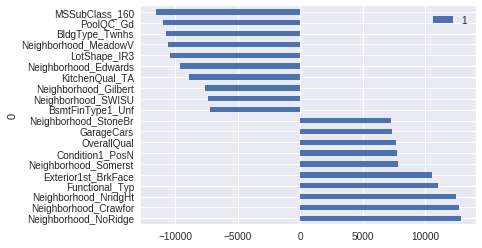

In [212]:
# prints the coefficients of the model created by the RidgeCV model with raw data 

ridge_cv_raw = RidgeCV()
ridge_cv_raw.fit(X_train, y_train)


plot_coef(ridge_cv_raw)
plt.show()

#### Which features add / take away most value from a home?

According to the above plot, any house that belongs to MSSubClass 160 (2-Story PUD - 1946 & Newer) loses on average more than $10,000 off of it's sale price simply by being a part of that MSSubClass. The other features that take away the most value from a home include the pool quality being marked as good and/or the building type being labelled as a townhouse. There are a few neighborhoods that contribute to lower home prices, the worst being Meadow Village. Another relatively large contributing factor to a lower sale price is the lot shape of the home being marked as irregular.

The three features that add the most value to a home all depend on the neighborhood the home is in. Being in the Northridge neighborhood adds the most value, while being in the Crawford neighborhood or the Northridge Heights neighborhood come in 2nd and 3rd respectively for the amount of value it adds to the home price. Other things that affect the value of a home in a positive way is whether the functionality of the house is typical (rather than damaged or having major deductions) and having a brick face for the exterior covering of the home.

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)